**Importovannje biblioteka**

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
#Author:
#Aleksandar Jovanov 2017200014

***Izgled podataka***

FuelConsumptionCo2.csv, sadrzi potrosnju goriva i ispustanje Carbon dioksida za specificni model vozila u Kanadi 

* MODELYEAR npr. 2014
* MAKE npr. Acura
* MODEL npr. ILX
* VEHICLE CLASS npr. SUV
* ENGINE SIZE npr. 4.7
* CYLINDERS npr. 6
* TRANSMISSION npr. A6
* FUEL CONSUMPTION in CITY(L/100 km) npr. 9.9
* FUEL CONSUMPTION in HWY (L/100 km) npr. 8.9
* FUEL CONSUMPTION COMB (L/100 km) npr. 9.2
* CO2 EMISSIONS (g/km) npr. 182 --> low --> 0

**Citanje podataka**

In [59]:
df = pd.read_csv('FuelConsumptionCo2.csv')
#Citanje privih 10 redova
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


# 1) Estimacija uslovnih i bezuslovnih verovatnoća određenih događaja


Bezuslovna verovatnoca za izduvne gasove poredjane po niskoj,srednoj i visokoj verovatnoci.

In [60]:
#Ucitavanje vrednosti za mali nivo izduvnih gasova

data_temp =  ((df["CO2EMISSIONS"]>=100) & (df["CO2EMISSIONS"]<=200)).value_counts() 
CO2EMISSIONS_low=data_temp[True]
CO2EMISSIONS_low

236

In [61]:
#Ucitavanje vrednosti za srednji nivo izduvnih gasova
data_temp = ((df["CO2EMISSIONS"]>=201) & (df["CO2EMISSIONS"]<=350)).value_counts() 
CO2EMISSIONS_medium=data_temp[True]
CO2EMISSIONS_medium

730

In [62]:
#Ucitavanje vrednosti za visoki nivo izduvnih gasova
data_temp = (df["CO2EMISSIONS"]>350 ).value_counts() 
CO2EMISSIONS_high=data_temp[True]
CO2EMISSIONS_high

101

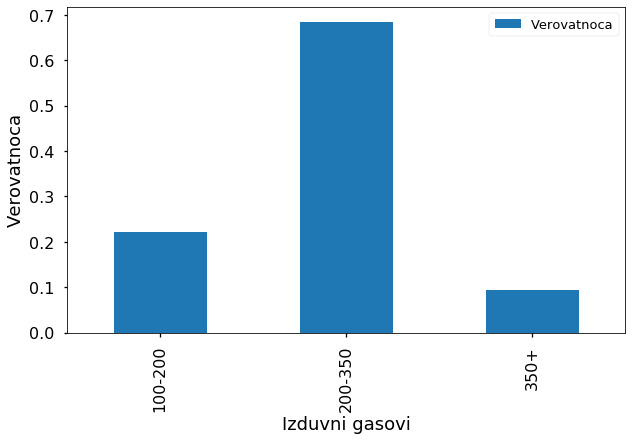

In [63]:
#Svaki element se podeli sa ukupnim brojem elemenata
P_izduvni_gasovi = pd.DataFrame([CO2EMISSIONS_low, CO2EMISSIONS_medium, CO2EMISSIONS_high]/(CO2EMISSIONS_low + CO2EMISSIONS_medium+ CO2EMISSIONS_high)) # DataFrame struktura sa verovatnocama
P_izduvni_gasovi.index = ["100-200","200-350","350+"]
P_izduvni_gasovi.columns = ["Verovatnoca"]

# Crtanje bar grafika:
P_izduvni_gasovi.plot.bar(figsize=(10,6),fontsize=16)
plt.xlabel("Izduvni gasovi",fontsize=18)
plt.ylabel("Verovatnoca",fontsize=18)
plt.show()

Bezuslovna verovatnoca za velicinu  motora poredjane po velicini.

In [64]:
#ucitavanje vrednosti za motore male velicine
data_temp =  ((df["ENGINESIZE"]>=1.0) & (df["ENGINESIZE"]<=2.5)).value_counts() 
ENGINESIZE_small=data_temp[True]
ENGINESIZE_small

429

In [65]:
#ucitavanje vrednosti za motore srednje velicine
data_temp = ((df["ENGINESIZE"]>2.5) & (df["ENGINESIZE"]<=5.0)).value_counts() 
ENGINESIZE_medium=data_temp[True]
ENGINESIZE_medium

472

In [66]:
#ucitavanje vrednosti za vece motore
data_temp = (df["ENGINESIZE"]>5.0 ).value_counts() 
ENGINESIZE_big=data_temp[True]
ENGINESIZE_big

166

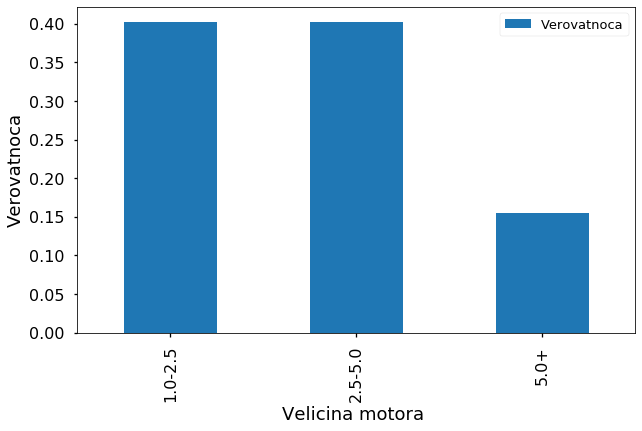

In [67]:
P_velicina_motora = pd.DataFrame([ENGINESIZE_small, ENGINESIZE_small, ENGINESIZE_big]/(ENGINESIZE_small + ENGINESIZE_medium+ ENGINESIZE_big)) # DataFrame struktura sa verovatnocama
P_velicina_motora.index = ["1.0-2.5","2.5-5.0","5.0+"]
P_velicina_motora.columns = ["Verovatnoca"]

# Crtanje bar grafika:
P_velicina_motora.plot.bar(figsize=(10,6),fontsize=16)
plt.xlabel("Velicina motora ",fontsize=18)
plt.ylabel("Verovatnoca",fontsize=18)
plt.show()

**Uslovna verovatnoca da vozilo proizvodi veliki nivo izduvnih gasova pod uslovom da vozilo koristi posebnu vrstu goriva **

In [68]:
#Ucitavanje vrednosti za veliki nivo izduvnih gasova
data_temp = df.loc[df["CO2EMISSIONS"]>350,"FUELTYPE"]
data_temp=data_temp.value_counts()  
data_temp

Z    51
X    37
E    13
Name: FUELTYPE, dtype: int64

In [69]:
#Ucitavanje vrednosti za tip goriva 
data_temp1 = df["FUELTYPE"].value_counts()
data_temp1

X    514
Z    434
E     92
D     27
Name: FUELTYPE, dtype: int64

In [70]:

P_uslovna = pd.DataFrame(data_temp/data_temp1) 
P_uslovna.index = ["X","Z","E","D"]
P_uslovna.columns = ["Uslovna verovatnoca"]
#Prikaz vrednosti za veliki nivo izduvnih gasova pod uslovom da se korisi oredjeni tip goriva
P_uslovna

,Uslovna verovatnoca
X,NaN
Z,0.141304
E,0.071984
D,0.117512


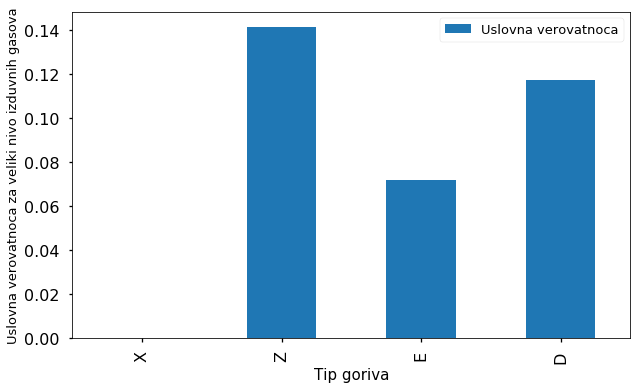

In [71]:
#Crtanje grafika
P_uslovna.plot.bar(figsize=(10,6),fontsize=16)
plt.xlabel("Tip goriva",fontsize=15)
plt.ylabel("Uslovna verovatnoca za veliki nivo izduvnih gasova",fontsize=13)
plt.show()

Ovo naravno nisu tacni rezultati u realnom svetu, kao ni podaci i iz csv falja. Podaci su cisto radi simulacije uneti.
Ali kao sto vidimo Z-Tip goriva proizvodi najvecu kolicnu Carbon Dioksida a najmanju E-Tip goriva. Dok X-Tip goriva u ovoj simulacije ne koristi nijedno vozilo.

# 2) Estimacija parametara raspodela pojedinačnih promenljivih (matematičko očekivanje, varijansa, standardna devijacija, medijana, kvartil, kvantil)


In [72]:
# racunamo za kolonu ENGINESIZE, skraceno matematicko ocekivanje, standardnu devijaciju, medijanu i kvartile

data = df.loc[:, ["ENGINESIZE","CO2EMISSIONS"]]
data.describe()


,ENGINESIZE,CO2EMISSIONS
count,1067.000000,1067.000000
mean,3.346298,256.228679
std,1.415895,63.372304
min,1.000000,108.000000
25%,2.000000,207.000000
50%,3.400000,251.000000
75%,4.300000,294.000000
max,8.400000,488.000000


In [73]:
data.var() #estimacija varijanse

ENGINESIZE         2.004759
CO2EMISSIONS    4016.048970
dtype: float64

In [74]:
data.quantile(0.1) # estimacija kvantila 0.1

ENGINESIZE        1.6
CO2EMISSIONS    182.0
Name: 0.1, dtype: float64

In [75]:
data.quantile(0.9) # estimacija kvantila 0.9

ENGINESIZE        5.4
CO2EMISSIONS    347.0
Name: 0.9, dtype: float64

# 3) Estimacija parametara združenih raspodela (kovarijansa i koeficijent korelacije)

In [76]:
# estimiracemo prvo kovarijansu a zatim koeficijent korelacije kao parametre zdruzenih raspodela 2 promenljive(ENGINESIZE i CO2EMISSIONS)

#kovarijansa
data.cov()

,ENGINESIZE,CO2EMISSIONS
ENGINESIZE,2.004759,78.436588
CO2EMISSIONS,78.436588,4016.048970


In [77]:
# koeficijent korelacije:
data.cov()['ENGINESIZE']['CO2EMISSIONS']/(data.std()['ENGINESIZE']*data.std()['CO2EMISSIONS'])

0.8741543683958116

# 4) Estimacija funkcije gustine raspodele pomoću histograma i testiranje hipoteza o raspodeli korišćenjem Kolmogorov-Smirnov i/ili hi-kvadrat testa

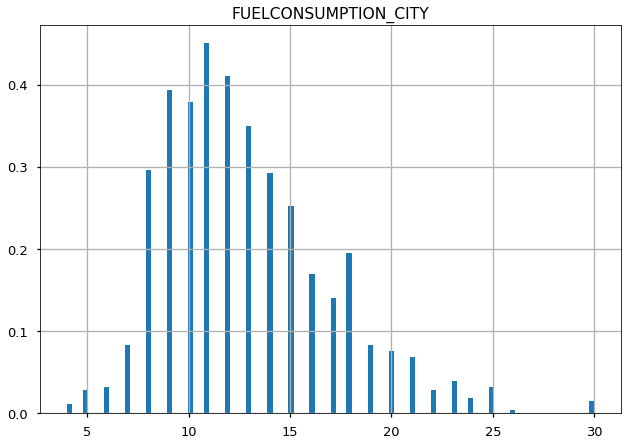

In [78]:
# prvo cemo uraditi estimaciju funkcije gustine raspodele za kolonu FUELCONSUMPTION_CITY - potrosnju goriva pri voznji u gradu na 100km

data_FC_City = df.loc[:, ["FUELCONSUMPTION_CITY"]]
data_FC_City = data_FC_City.astype(np.int64)
plt.style.use('seaborn-talk')
hist = data_FC_City.hist(density=True,bins=100)
plt.show()

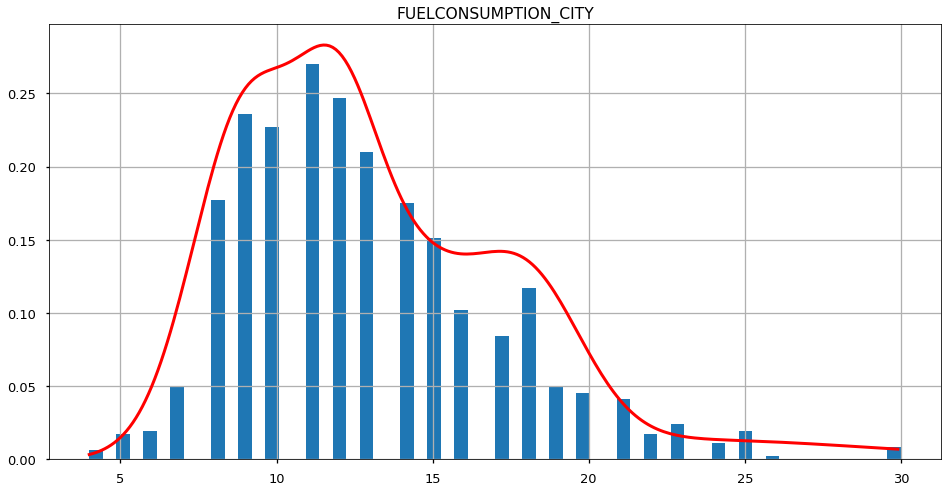

In [79]:
# Normalna raspodela je izmedju ostalog vazna jer se jako cesto dobija kao aproskimirajuca raspodela slucajnih promenljivih 

# Probacemo aproksimaciju Gausovom raspodelom, i Gausovom mesavinom sa adekvatnim srednjim vrednostima i varijansama
from scipy.stats import norm

# kreiramo histogram
hist = data_FC_City.hist(density=True,bins=60)
korak = 0.1
x = np.arange(4, 30, korak)


m1=9
sig1=1.7

m2=11.9
sig2=1.3

m3=14
sig3=2

m4=18
sig4=1.8

m5=23
sig5=6



# Pravimo niz verovatnoca funkcije gustine Normalne (Gausove) raspodele
P_norm_mix5 = np.array(norm.pdf(x, m1, sig1)+0.5*norm.pdf(x, m2, sig2)+
                       0.6*norm.pdf(x, m3, sig3)+0.5*norm.pdf(x, m4, sig4)+0.2*norm.pdf(x, m5, sig5))
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.plot(x, P_norm_mix5, 'r', linewidth=3.0)
plt.show()

In [80]:


# Na osnovu gornje aproksimacije odredicemo verovatnocu da je potrosnja goriva pri gradskoj voznji izmedju 7 i 14 l na 100km

# Rucno priblizno integraljenje:
PP=np.array([korak*z for x,z in zip(x,P_norm_mix5) if (x>7 and x<14)])
P_trazeno=PP.sum(axis=0)
print(P_trazeno)



1.6739747974969112


In [81]:
 #Sada cemo da radimo testiranje hipoteza o raspodeli korišćenjem Kolmogorov-Smirnov testa
from scipy import stats

# testiracemo da li je ovo normalna raspodele:

velicina_uzorka=1000

stats.kstest(data_FC_City.sample(velicina_uzorka).dropna().values.T, cdf='norm',args=(data_FC_City.dropna().values.mean(), data_FC_City.dropna().values.std()))  
# u argumente stavljamo ocene matematickog ocekivanja i standardne devijacije

KstestResult(statistic=0.9999840087119859, pvalue=3.1982576028211085e-05)

p vrednost je izuzetno velika tako da necemo odbaciti hipotezu da je u pitanju normalna raspodela za kolonu "FUELCONSUMPTION_CITY"


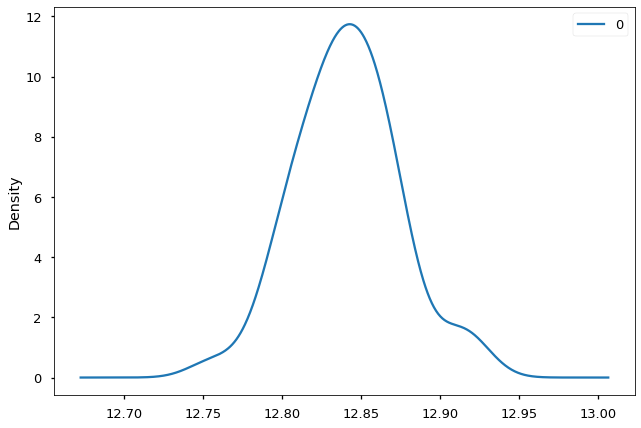

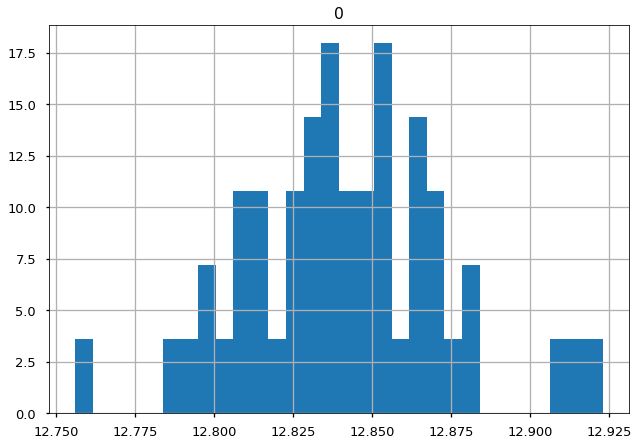

In [82]:


estimatori_srednje_vrednosti = []       

broj_estimacija_srednjih_vrednosti=50   # ovo je broj estimacija, svaki je baziran na uzorku velicine 'velicina_uzorka'
for x in range(broj_estimacija_srednjih_vrednosti):
    
    uzorak=data_FC_City.sample(velicina_uzorka)
    estimatori_srednje_vrednosti.append( uzorak.dropna().values.mean() )
    
# plotujemo estimaciju gustine verovatnoce raspodele srednjih vrednosti (pomocu histograma) - vidimo da je priblizno normalna!  
pd.DataFrame(estimatori_srednje_vrednosti).plot(kind="density")   

# histogram srednjih vrednosti:
hist = pd.DataFrame(estimatori_srednje_vrednosti).hist(density=True,bins=30) 
plt.show()



In [83]:
# testiracemo da li estimatori imaju normalnu raspodelu:
stats.kstest(estimatori_srednje_vrednosti, cdf='norm',args=(data_FC_City.dropna().values.mean(), data_FC_City.dropna().values.std()/velicina_uzorka**0.5))

KstestResult(statistic=0.32079503680112964, pvalue=4.455397573960224e-05)

Za estimatore je izuzetno manja p vrednost

In [84]:
# testiranje hipoteze hi-kvadrat testom za raspodelu estimatora
# Hi-kvadrat testom ukratko ispitujemo da li postoji znacajnija razlika izmedju prave raspodele i estimirane raspodele
stats.chisquare(estimatori_srednje_vrednosti) # pretpostavlja se uniformna raspodela posto f_exp nije specificirano

Power_divergenceResult(statistic=0.00411407972263885, pvalue=1.0)

Vidimo da je p vrednost dobra sto znaci da su estimatori u uniformnoj raspodeli

# 5) Regresija (Linearna, Visestruka i Nelinearna)

Plotovanje FUELCONSUMPTION_COMB,CYLINDERS,ENGINESIZE sa CO2EMISSIONS radi pregleda njihovih linearnih relacija

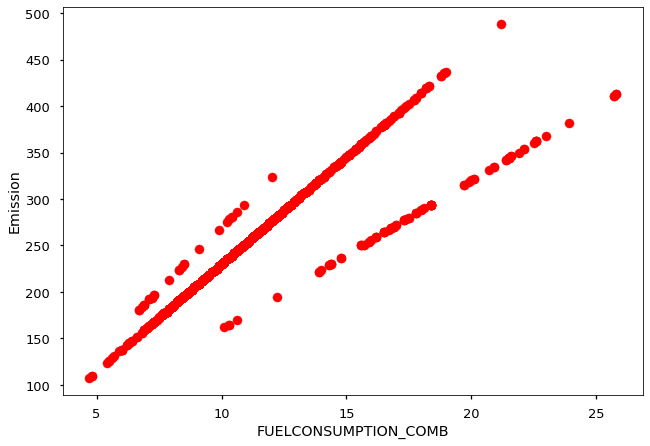

In [85]:
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS,  color='red')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

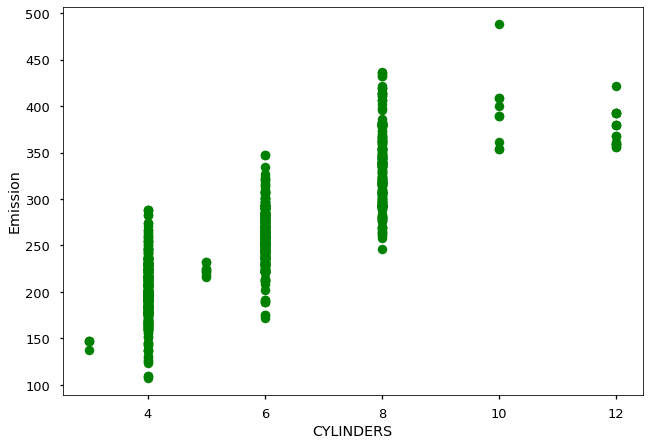

In [86]:
plt.scatter(df.CYLINDERS, df.CO2EMISSIONS,  color='green')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
plt.show()

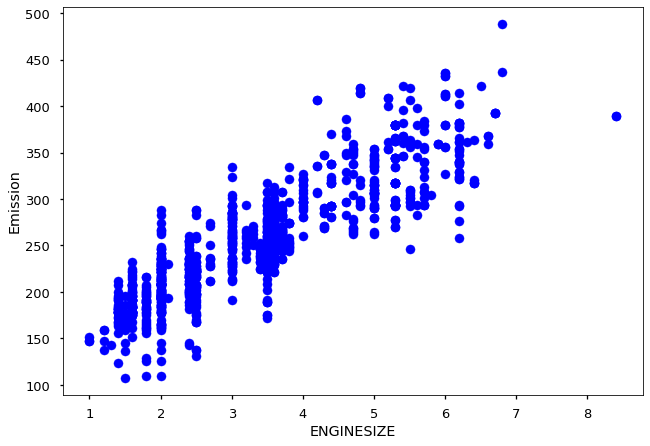

In [87]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS,  color='blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("Emission")
plt.show()

**Kreiranje i testiranje test seta podataka**
train/test podrazumeva podelu podataka na obuku i skupove za testiranje, koji su međusobno isključivi. Nakon toga, treniranje sa skupom train i testiranje  pomoću skupa test. Ovo će obezbediti precizniju procenu za tačnost uzorka, zato što provera podataka o testiranju nije deo skupa podataka koji su korišćeni za obučavanje podataka. To je realističnije za stvarne svetske probleme.



In [88]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]


**Model regresije**
Linearna regresija se uklapa u linearni model sa koeficijentima B = (b1,..., bn) da bi se umanjila ukupna suma kvadrata između nezavisnih x u DataSet-u, i zavisno od linearnog približavanja.

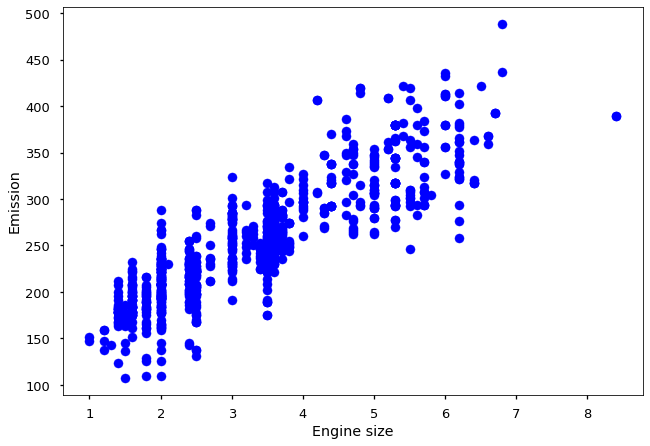

In [89]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()


Modelovanje
Koristi se sklearn za linearni model

In [90]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.90860448]]
Intercept:  [125.31571289]


Text(0, 0.5, 'Emission')

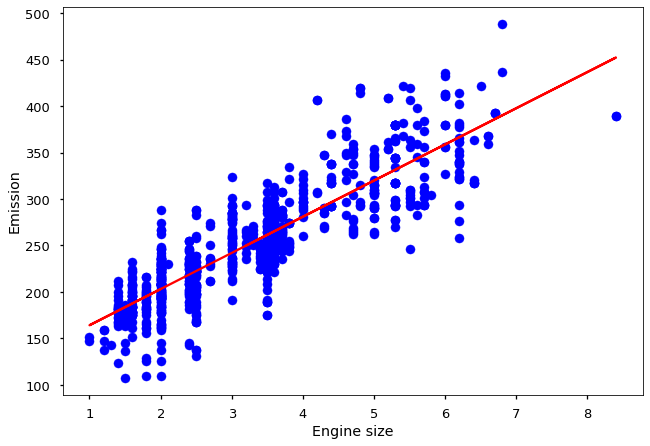

In [91]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Ocena greske linearne regresije Poredimo stvarne podatke sa predpostavljenim podacima da bi smo izracunali preciznost regresionog modela.
Koristi se MSE( Mean Squared Error ) da bi se izracunala preciznost modela bazirana na test setu. postoji vise metrika:
-Mean apsolutna greska. Je mean ABS vrednosti gresaka.
-R2-score nije greska ali je popularna metoda za izracunavanje preciznosti modela.

In [92]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))

print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))

print("R2-score: %.2f" % r2_score(test_y_ , test_y) )



Mean absolute error: 21.75
Residual sum of squares (MSE): 812.66
R2-score: 0.73


Ispod je prikaz racunanja Visestruke Regresije.
Racunamo zavisnost za vise od 2 promenljive, tacnije zavisnost jedne zavise promenljive od vise nezavisnih.

In [93]:
from statsmodels.formula.api import ols

data_visestruka = df.loc[:, ["CO2EMISSIONS", "ENGINESIZE", "CYLINDERS"]]

modelV = ols("CO2EMISSIONS ~ ENGINESIZE", data_visestruka).fit() # model nezavisan od velicine cilindra
print(modelV.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     3451.
Date:                Sun, 19 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:36:02   Log-Likelihood:                -5169.9
No. Observations:                1067   AIC:                         1.034e+04
Df Residuals:                    1065   BIC:                         1.035e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    125.3041      2.420     51.779      0.0

In [94]:
modelV = ols("CO2EMISSIONS ~ ENGINESIZE + CYLINDERS", data_visestruka).fit() # zavisnost od dva faktora
print(modelV.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     1809.
Date:                Sun, 19 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:36:02   Log-Likelihood:                -5149.9
No. Observations:                1067   AIC:                         1.031e+04
Df Residuals:                    1064   BIC:                         1.032e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    108.5396      3.548     30.590      0.0

In [95]:
modelV2 = ols("CO2EMISSIONS ~ ENGINESIZE * CYLINDERS", data_visestruka).fit() # dva faktora + njihova interakcija (proizvod)
print(modelV2.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     1216.
Date:                Sun, 19 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:36:03   Log-Likelihood:                -5146.2
No. Observations:                1067   AIC:                         1.030e+04
Df Residuals:                    1063   BIC:                         1.032e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               86.4547 

In [96]:
# na kraju radimo estimaciju metodom Nelinearne regresije - polinomske kvadratne

# kvadratna regresija:

A=np.array(data_visestruka['CO2EMISSIONS'])
A=np.array([np.ones(len(A)), A, A**2])
y=np.array(data_visestruka['ENGINESIZE'])

w2 = np.linalg.lstsq(A.T,y)[0] # nalazenje optimalnih parametara (k,n i e gresku)
print('w2=',w2)

w2= [-1.94582294e+00  2.17706726e-02 -4.10748541e-06]


<ipython-input-96-44cd51009c45>:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w2 = np.linalg.lstsq(A.T,y)[0] # nalazenje optimalnih parametara (k,n i e gresku)


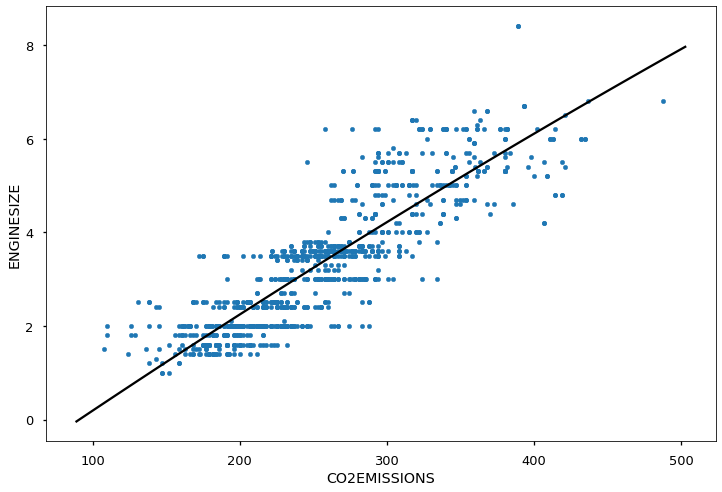

In [97]:
# funkcija koja racuna fitovanu vrednost u tacki x, za date parametre w
def f2(x,w):
    return w[0]+w[1]*x+w[2]*x**2


ax=data_visestruka.plot(kind='scatter',s=20,x='CO2EMISSIONS',y='ENGINESIZE',figsize=[12,8])

# pribavljanje najmanje i najvece vrednosti po x dimenziji, nalazenje opsega izmedju i kreiranje niza
x0,x1=plt.xlim()
opseg=x1-x0
X=np.arange(x0,x1,opseg/100.)

#crtanje tacaka i kvadratne parabolicne funkcije
ax.plot(X,f2(X,w2),'k')
plt.show()


Po ovim prikazima, zakljucujemo da su bolji rezultati za linearnu regresiju.